In [24]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as mat
df = pd.read_csv("metro.csv")

In [25]:
df.head()

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
0,59771,2022-05-08,Inderlok,Kashmere Gate,12.94,77.99,18.27,13.0,Smart Card,maintenance
1,21363,2023-01-12,Model Town,Dilshad Garden,2.33,35.89,83.71,15.0,Tourist Card,maintenance
2,127325,2023-07-13,Kashmere Gate,Netaji Subhash Place,5.56,64.35,43.70,9.0,Single,off-peak
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,NaN,maintenance
4,144298,2022-11-06,Rajiv Chowk,Kalkaji Mandir,9.66,104.96,83.84,23.0,Single,off-peak


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TripID              150000 non-null  int64  
 1   Date                150000 non-null  object 
 2   From_Station        150000 non-null  object 
 3   To_Station          150000 non-null  object 
 4   Distance_km         150000 non-null  float64
 5   Fare                150000 non-null  float64
 6   Cost_per_passenger  150000 non-null  float64
 7   Passengers          148500 non-null  float64
 8   Ticket_Type         148500 non-null  object 
 9   Remarks             123743 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 11.4+ MB


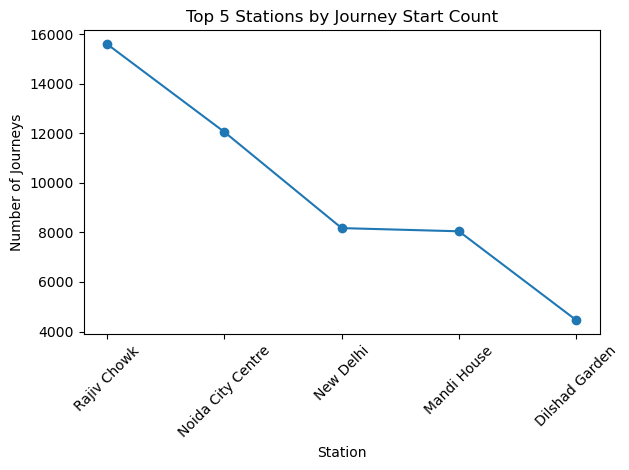

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("metro.csv")

top5 = df['From_Station'].value_counts().head(5)

plt.plot(top5.index, top5.values, marker='o')
plt.title("Top 5 Stations by Journey Start Count")
plt.xlabel("Station")
plt.ylabel("Number of Journeys")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


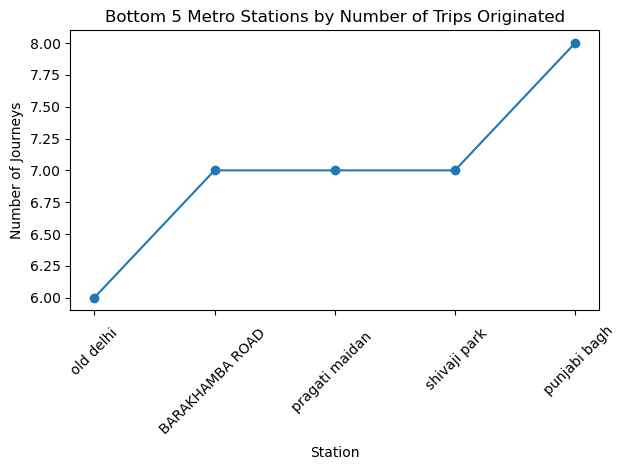

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("metro.csv")

bottom5 = df['From_Station'].value_counts().sort_values().head(5)

plt.plot(bottom5.index, bottom5.values, marker='o')
plt.title("Bottom 5 Metro Stations by Number of Trips Originated")
plt.xlabel("Station")
plt.ylabel("Number of Journeys")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


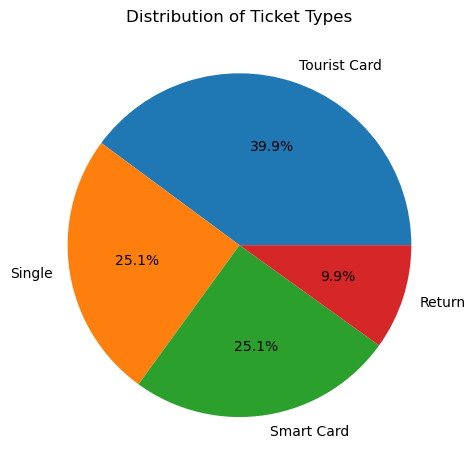

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("metro.csv")

ticket_counts = df['Ticket_Type'].value_counts()

plt.pie(ticket_counts, labels=ticket_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Ticket Types")
plt.tight_layout()
plt.show()


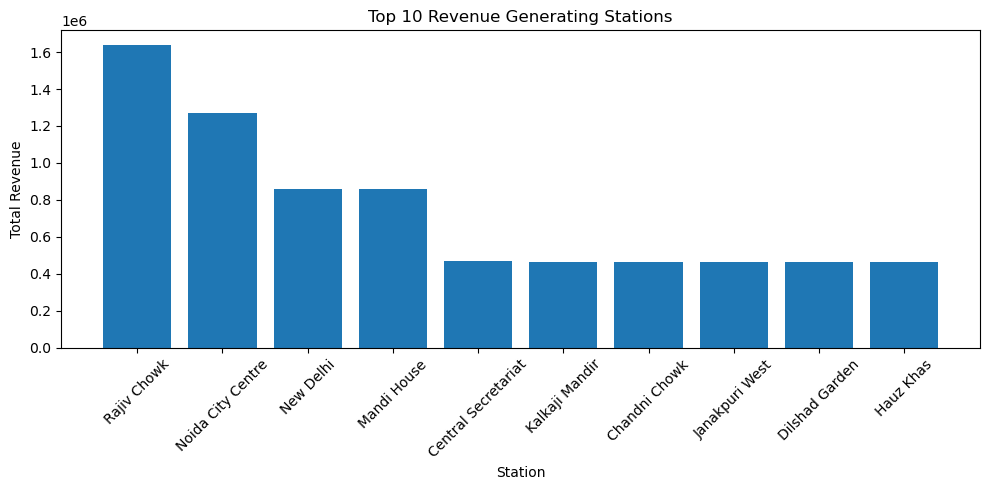

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("metro.csv")
revenue = df.groupby("From_Station")["Fare"].sum().sort_values(ascending=False)
top10 = revenue.head(10)

plt.figure(figsize=(10,5))
plt.bar(top10.index, top10.values)
plt.title("Top 10 Revenue Generating Stations")
plt.xlabel("Station")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
df["Profit"] = df["Fare"] - df["Cost_per_passenger"]


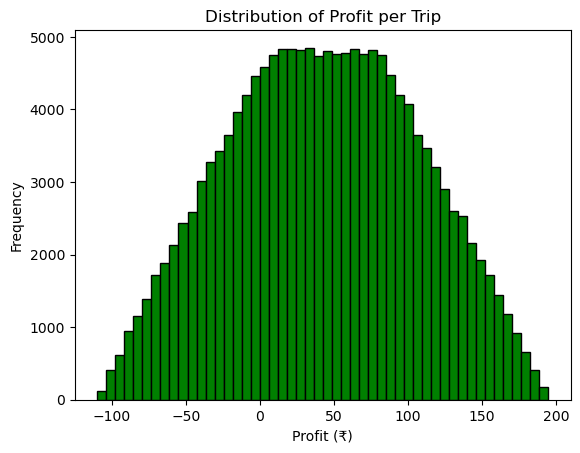

In [32]:
plt.hist(df["Profit"], bins=50, color='green', edgecolor='black')
plt.title("Distribution of Profit per Trip")
plt.xlabel("Profit (₹)")
plt.ylabel("Frequency")
plt.show()


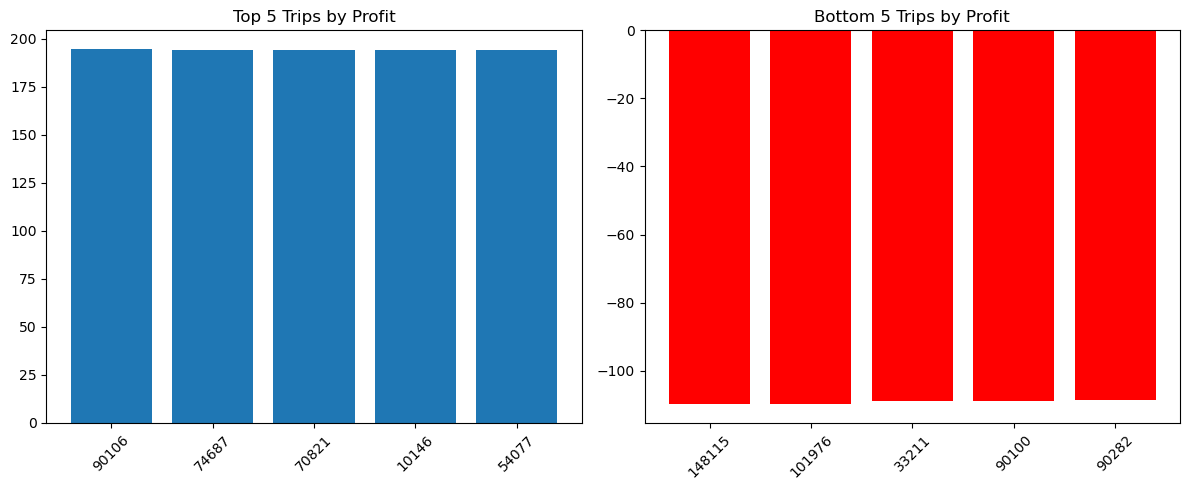

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("metro.csv")
df["Profit"] = df["Fare"] - df["Cost_per_passenger"]

top5 = df.nlargest(5, "Profit")
bottom5 = df.nsmallest(5, "Profit")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.bar(top5.TripID.astype(str), top5.Profit)
plt.title("Top 5 Trips by Profit")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.bar(bottom5.TripID.astype(str), bottom5.Profit, color='red')
plt.title("Bottom 5 Trips by Profit")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


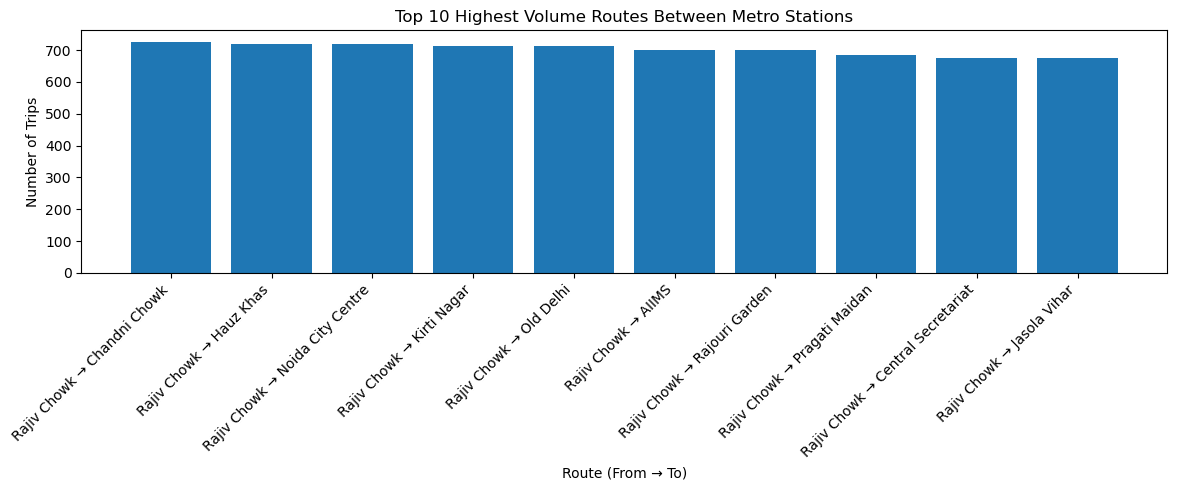

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("metro.csv")

# Calculate volume between each From–To pair
volume = df.groupby(["From_Station", "To_Station"]).size().sort_values(ascending=False)

# Top 10 busiest routes
top10 = volume.head(10)

# Labels for x-axis
labels = [f"{a} → {b}" for a, b in top10.index]

plt.figure(figsize=(12,5))
plt.bar(labels, top10.values)
plt.title("Top 10 Highest Volume Routes Between Metro Stations")
plt.xlabel("Route (From → To)")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



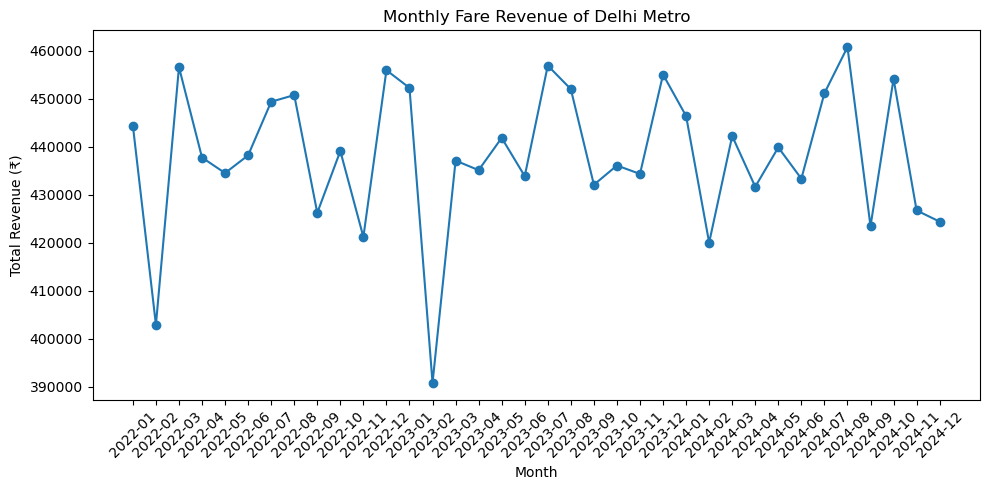

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("metro.csv")
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M")
monthly_revenue = df.groupby("Month")["Fare"].sum()
plt.figure(figsize=(10,5))
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values, marker='o')
plt.title("Monthly Fare Revenue of Delhi Metro")
plt.xlabel("Month")
plt.ylabel("Total Revenue (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


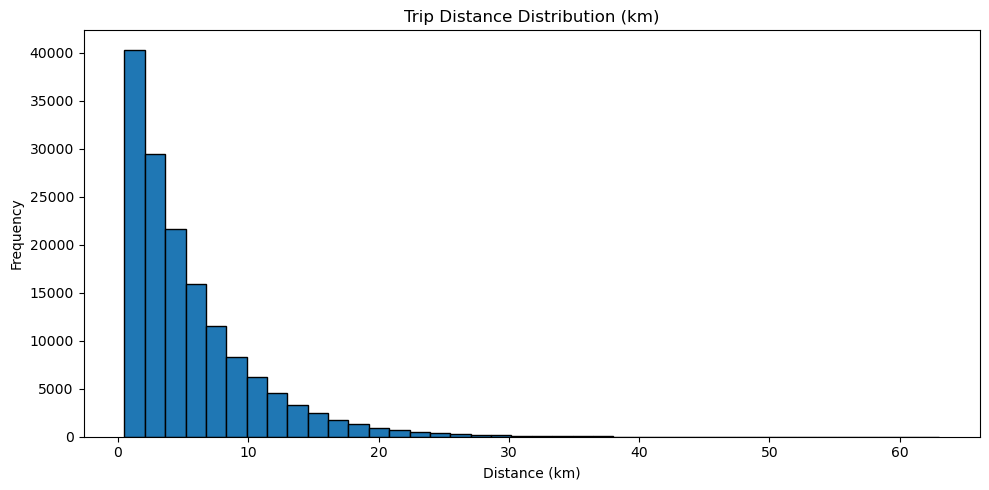

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("metro.csv")

plt.figure(figsize=(10,5))
plt.hist(df["Distance_km"], bins=40, edgecolor='black')
plt.title("Trip Distance Distribution (km)")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


/var/folders/7l/05qrcybj06x9tcmxlqtgsgqh0000gn/T/ipykernel_1537/2428827746.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df["Fare"], df["Cost_per_passenger"]],labels=["Fare", "Cost per Passenger"])


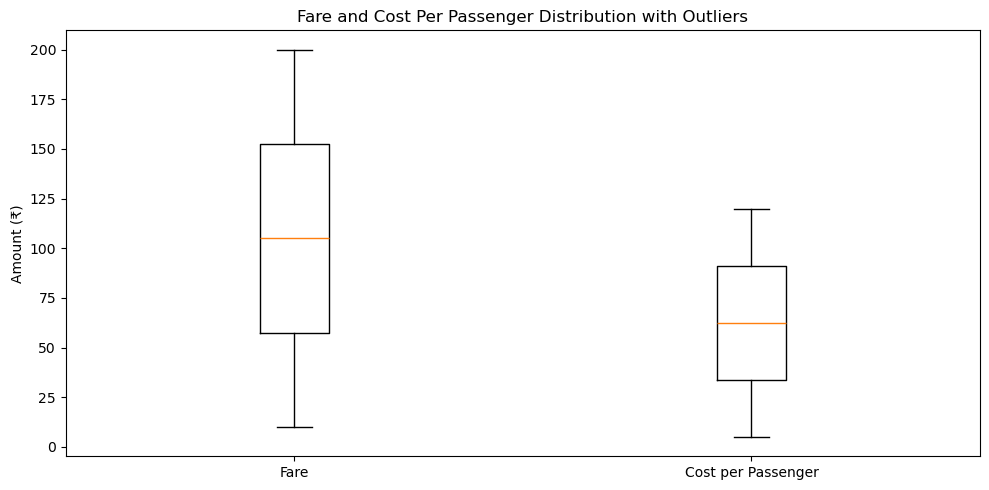

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("metro.csv")

plt.figure(figsize=(10,5))

# Default blue color boxplots
plt.boxplot([df["Fare"], df["Cost_per_passenger"]],labels=["Fare", "Cost per Passenger"])

plt.title("Fare and Cost Per Passenger Distribution with Outliers")
plt.ylabel("Amount (₹)")
plt.tight_layout()
plt.show()


